#                                       New York City Taxi Fare Prediction : 

## Intoduction :  

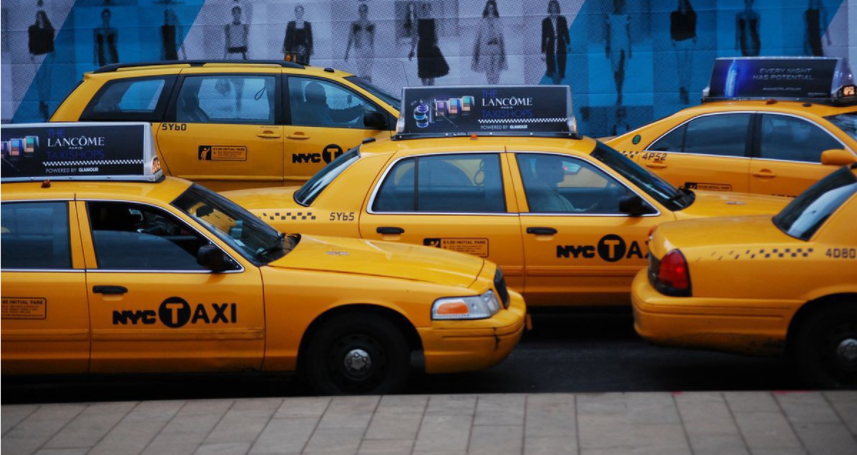

I've always wondered about  how my taxi fare was already decided whenever I booked a ride on Bolt .Not only they give fare price but it frequently changed according to time and traffic . But know with the knowledge I got I think I have the answer . To explain this I've chosen a dataset from kaggle .The goal is to predict the fare of the rider .

## Features and Data fields descriptions : 

+train.csv : - Input features and target "fare_amount" values for the training set (about 55M rows).

+test.csv :  - Input features for the test set (about 10K rows). Our goal is to predict "fare_amount" for each row.

+ID :  - Unique string identifying each row in both the training and test sets.

+pickup_datetime : -Timestamp value indicating when the taxi ride started.

+pickup_longitude : - float for longitude coordinate of where the taxi ride started.

+pickup_latitude: - float for latitude coordinate of where the taxi ride started.

+dropoff_longitude: - float for longitude coordinate of where the taxi ride ended.

+dropoff_latitude: - float for latitude coordinate of where the taxi ride ended.

+passenger_count - integer indicating the number of passengers in the taxi ride.

+fare_amount: - float dollar amount of the cost of the taxi ride. This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV.

## 1-Loading dataset : 

In [288]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import sklearn

In [289]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

##  2-Data preprocessing

In [290]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1048575 non-null  object 
 1   fare_amount        1048575 non-null  float64
 2   pickup_datetime    1048575 non-null  object 
 3   pickup_longitude   1048575 non-null  float64
 4   pickup_latitude    1048575 non-null  float64
 5   dropoff_longitude  1048565 non-null  float64
 6   dropoff_latitude   1048565 non-null  float64
 7   passenger_count    1048575 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 64.0+ MB


In [383]:
train.shape

(1005004, 14)

In [291]:
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

Because the number of null entries is negligible and we can't fill them with another number I've decided to eliminate them .

In [292]:
train=train.dropna(how='any',axis='rows')

In [293]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [294]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### ID : 

I've decided to drop the id column from both the training and testing datasets as it doesn't influence our study .

In [295]:
train.drop(columns=["key"],inplace=True)
test.drop(columns=["key"],inplace=True)

### pickup_datetime : 

In [296]:
train['pickup_datetime']=pd.to_datetime(train["pickup_datetime"],format='%Y-%m-%d %H:%M:%S %Z')

In [297]:
def pickup_datetime(df):
    df['pickup_datetime']=pd.to_datetime(df["pickup_datetime"],format='%Y-%m-%d %H:%M:%S %Z')
    df["year"]=df["pickup_datetime"].dt.strftime('%Y')
    df["month"]=df["pickup_datetime"].dt.strftime('%m')
    df["day"]=df["pickup_datetime"].dt.strftime('%d')
    df["hour"]=df["pickup_datetime"].dt.strftime('%H')


In [298]:
pickup_datetime(train)

In [299]:
train.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5 2009-06-15 17:26:21+00:00        -73.844311        40.721319   
1         16.9 2010-01-05 16:52:16+00:00        -74.016048        40.711303   
2          5.7 2011-08-18 00:35:00+00:00        -73.982738        40.761270   
3          7.7 2012-04-21 04:30:42+00:00        -73.987130        40.733143   
4          5.3 2010-03-09 07:51:00+00:00        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  year month day hour  
0         -73.841610         40.712278                1  2009    06  15   17  
1         -73.979268         40.782004                1  2010    01  05   16  
2         -73.991242         40.750562                2  2011    08  18   00  
3         -73.991567         40.758092                1  2012    04  21   04  
4         -73.956655         40.783762                1  2010    03  09   07

In [300]:
pickup_datetime(test)

In [301]:
test.head()

pickup_datetime  pickup_longitude  pickup_latitude  \
0 2015-01-27 13:08:24+00:00        -73.973320        40.763805   
1 2015-01-27 13:08:24+00:00        -73.986862        40.719383   
2 2011-10-08 11:53:44+00:00        -73.982524        40.751260   
3 2012-12-01 21:12:12+00:00        -73.981160        40.767807   
4 2012-12-01 21:12:12+00:00        -73.966046        40.789775   

   dropoff_longitude  dropoff_latitude  passenger_count  year month day hour  
0         -73.981430         40.743835                1  2015    01  27   13  
1         -73.998886         40.739201                1  2015    01  27   13  
2         -73.979654         40.746139                1  2011    10  08   11  
3         -73.990448         40.751635                1  2012    12  01   21  
4         -73.988565         40.744427                1  2012    12  01   21

### pickup_latitude : 

In [302]:
train = train.loc[train['pickup_latitude'].between(40, 42)]

In [303]:
train.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  1.028129e+06      1.028129e+06     1.028129e+06       1.028129e+06   
mean   1.133447e+01     -7.397353e+01     4.075106e+01      -7.390907e+01   
std    9.762867e+00      2.699531e+00     3.017370e-02       3.153008e+00   
min   -4.490000e+01     -1.452988e+03     4.005272e+01      -1.329621e+03   
25%    6.000000e+00     -7.399228e+01     4.073657e+01      -7.399157e+01   
50%    8.500000e+00     -7.398209e+01     4.075339e+01      -7.398057e+01   
75%    1.250000e+01     -7.396832e+01     4.076756e+01      -7.396526e+01   
max    5.000000e+02      5.517580e-01     4.184199e+01       4.558162e+01   

       dropoff_latitude  passenger_count  
count      1.028129e+06     1.028129e+06  
mean       4.071813e+01     1.685041e+00  
std        4.220153e+00     1.307873e+00  
min       -3.114339e+03     0.000000e+00  
25%        4.073551e+01     1.000000e+00  
50%        4.075385e+01     1.000000e+00  
75%        4.076840e+01     2.000000e+00  
max        1.903112e+03     9.000000e+00

In [304]:
test.describe()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count       9914.000000      9914.000000        9914.000000       9914.000000   
mean         -73.974722        40.751041         -73.973657         40.751743   
std            0.042774         0.033541           0.039072          0.035435   
min          -74.252193        40.573143         -74.263242         40.568973   
25%          -73.992501        40.736125         -73.991247         40.735254   
50%          -73.982326        40.753051         -73.980015         40.754065   
75%          -73.968013        40.767113         -73.964059         40.768757   
max          -72.986532        41.709555         -72.990963         41.696683   

       passenger_count  
count      9914.000000  
mean          1.671273  
std           1.278747  
min           1.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max           6.000000

###  pickup_longitude :

In [305]:
train = train.loc[train['pickup_longitude'].between(-75, -72)]

In [306]:
train.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  1.027892e+06      1.027892e+06     1.027892e+06       1.027892e+06   
mean   1.133322e+01     -7.397514e+01     4.075105e+01      -7.391183e+01   
std    9.761264e+00      3.914400e-02     3.002492e-02       3.120498e+00   
min   -4.490000e+01     -7.496814e+01     4.005272e+01      -1.329621e+03   
25%    6.000000e+00     -7.399228e+01     4.073657e+01      -7.399157e+01   
50%    8.500000e+00     -7.398209e+01     4.075339e+01      -7.398057e+01   
75%    1.250000e+01     -7.396832e+01     4.076756e+01      -7.396526e+01   
max    5.000000e+02     -7.270287e+01     4.180025e+01       4.558162e+01   

       dropoff_latitude  passenger_count  
count      1.027892e+06     1.027892e+06  
mean       4.071899e+01     1.684948e+00  
std        4.216433e+00     1.307755e+00  
min       -3.114339e+03     0.000000e+00  
25%        4.073551e+01     1.000000e+00  
50%        4.075385e+01     1.000000e+00  
75%        4.076840e+01     2.000000e+00  
max        1.903112e+03     9.000000e+00

### dropoff_longitude : 

In [307]:
train = train.loc[train['dropoff_longitude'].between(-75, -72)]

### dropoff_latitude : 

In [308]:
train = train.loc[train['dropoff_latitude'].between(40, 42)]

### fare_amount : 

In [309]:
train["fare_amount"].describe()

count    1.026799e+06
mean     1.132856e+01
std      9.745094e+00
min     -4.490000e+01
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      5.000000e+02
Name: fare_amount, dtype: float64

In [310]:
train = train.drop(train[train['fare_amount'] <= 0].index, axis = 0)


In [311]:
train["fare_amount"].describe()

count    1.026739e+06
mean     1.132943e+01
std      9.744561e+00
min      1.000000e-02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      5.000000e+02
Name: fare_amount, dtype: float64

### passenger_count : 

In [312]:
train["passenger_count"].describe()

count    1.026739e+06
mean     1.684983e+00
std      1.307671e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

In [313]:
train=train[train["passenger_count"]<=5]

In [314]:
test=test[test["passenger_count"]<=5]

In [315]:
test["passenger_count"].describe()

count    9737.000000
mean        1.592585
std         1.148075
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: passenger_count, dtype: float64

###  Add new features  : 

In [316]:
# calculating trip distance using haversine formula
import math
def haversine(start_lon, start_lat, end_lon, end_lat):
    earth_radius = 6371
    start_lon, start_lat, end_lon, end_lat = map(math.radians, [start_lon, start_lat, end_lon, end_lat])
    lat_diff = end_lat - start_lat
    lon_diff = end_lon - start_lon
    
    a = pow(math.sin(lat_diff/2), 2) + math.cos(start_lat) * math.cos(start_lat) * pow(math.sin(lon_diff/2), 2)
    c = 2 * math.asin(math.sqrt(a))
    dist = earth_radius * c
    return dist 


    
    

In [317]:
def distance (df):
    dist_array = []
    for i in range(df.shape[0]):
        plon = df.iloc[i]['pickup_longitude']
        plat = df.iloc[i]['pickup_latitude']
        dlon = df.iloc[i]['dropoff_longitude']
        dlat = df.iloc[i]['dropoff_latitude']
        dist = haversine(plon, plat, dlon, dlat)
        dist_array.append(dist)
    
    df['haversine'] = dist_array

In [318]:
distance(train)
distance(test)

In [319]:
train.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5 2009-06-15 17:26:21+00:00        -73.844311        40.721319   
1         16.9 2010-01-05 16:52:16+00:00        -74.016048        40.711303   
2          5.7 2011-08-18 00:35:00+00:00        -73.982738        40.761270   
3          7.7 2012-04-21 04:30:42+00:00        -73.987130        40.733143   
4          5.3 2010-03-09 07:51:00+00:00        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  year month day hour  \
0         -73.841610         40.712278                1  2009    06  15   17   
1         -73.979268         40.782004                1  2010    01  05   16   
2         -73.991242         40.750562                2  2011    08  18   00   
3         -73.991567         40.758092                1  2012    04  21   04   
4         -73.956655         40.783762                1  2010    03  09   07   

   haversine  
0   1.030761  
1   8.450738  
2   1.389495  
3   2.799280  
4   1.999212

In [320]:
def clean_distances (df):
    df=df[df["haversine"]>0]

In [321]:
clean_distances (train)
clean_distances (test)

In [322]:
train.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5 2009-06-15 17:26:21+00:00        -73.844311        40.721319   
1         16.9 2010-01-05 16:52:16+00:00        -74.016048        40.711303   
2          5.7 2011-08-18 00:35:00+00:00        -73.982738        40.761270   
3          7.7 2012-04-21 04:30:42+00:00        -73.987130        40.733143   
4          5.3 2010-03-09 07:51:00+00:00        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  year month day hour  \
0         -73.841610         40.712278                1  2009    06  15   17   
1         -73.979268         40.782004                1  2010    01  05   16   
2         -73.991242         40.750562                2  2011    08  18   00   
3         -73.991567         40.758092                1  2012    04  21   04   
4         -73.956655         40.783762                1  2010    03  09   07   

   haversine  
0   1.030761  
1   8.450738  
2   1.389495  
3   2.799280  
4   1.999212

In [323]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

In [324]:
train['manhattan'] = minkowski_distance(train['pickup_longitude'], train['dropoff_longitude'],
                                       train['pickup_latitude'], train['dropoff_latitude'], 1)
test['manhattan'] = minkowski_distance(test['pickup_longitude'], test['dropoff_longitude'],
                                       test['pickup_latitude'],test['dropoff_latitude'], 1)


In [325]:
train['euclidean'] = minkowski_distance(train['pickup_longitude'], train['dropoff_longitude'],
                                       train['pickup_latitude'], train['dropoff_latitude'], 2)
test['euclidean'] = minkowski_distance(test['pickup_longitude'], test['dropoff_longitude'],
                                       test['pickup_latitude'],test['dropoff_latitude'], 2)


In [326]:
train.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5 2009-06-15 17:26:21+00:00        -73.844311        40.721319   
1         16.9 2010-01-05 16:52:16+00:00        -74.016048        40.711303   
2          5.7 2011-08-18 00:35:00+00:00        -73.982738        40.761270   
3          7.7 2012-04-21 04:30:42+00:00        -73.987130        40.733143   
4          5.3 2010-03-09 07:51:00+00:00        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  year month day hour  \
0         -73.841610         40.712278                1  2009    06  15   17   
1         -73.979268         40.782004                1  2010    01  05   16   
2         -73.991242         40.750562                2  2011    08  18   00   
3         -73.991567         40.758092                1  2012    04  21   04   
4         -73.956655         40.783762                1  2010    03  09   07   

   haversine  manhattan  euclidean  
0   1.030761   0.011742   0.009436  
1   8.450738   0.107481   0.079696  
2   1.389495   0.019212   0.013674  
3   2.799280   0.029386   0.025340  
4   1.999212   0.027194   0.019470

In [327]:
def convert_values(df):
    df["year"]=df["year"].astype("float")
    df["month"]=df["month"].astype("float")
    df["day"]=df["day"].astype("float")
    df["hour"]=df["hour"].astype("float")
    df["passenger_count"]=df["passenger_count"].astype("float")
    df["pickup_datetime"]=df["pickup_datetime"].astype("string")
convert_values(train)
convert_values(test)

In [328]:
train.head()

fare_amount            pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5  2009-06-15 17:26:21+00:00        -73.844311        40.721319   
1         16.9  2010-01-05 16:52:16+00:00        -74.016048        40.711303   
2          5.7  2011-08-18 00:35:00+00:00        -73.982738        40.761270   
3          7.7  2012-04-21 04:30:42+00:00        -73.987130        40.733143   
4          5.3  2010-03-09 07:51:00+00:00        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count    year  month   day  \
0         -73.841610         40.712278              1.0  2009.0    6.0  15.0   
1         -73.979268         40.782004              1.0  2010.0    1.0   5.0   
2         -73.991242         40.750562              2.0  2011.0    8.0  18.0   
3         -73.991567         40.758092              1.0  2012.0    4.0  21.0   
4         -73.956655         40.783762              1.0  2010.0    3.0   9.0   

   hour  haversine  manhattan  euclidean  
0  17.0   1.030761   0.011742   0.009436  
1  16.0   8.450738   0.107481   0.079696  
2   0.0   1.389495   0.019212   0.013674  
3   4.0   2.799280   0.029386   0.025340  
4   7.0   1.999212   0.027194   0.019470

## 3-Data visualization : 

Text(0, 0.5, 'Frequency')

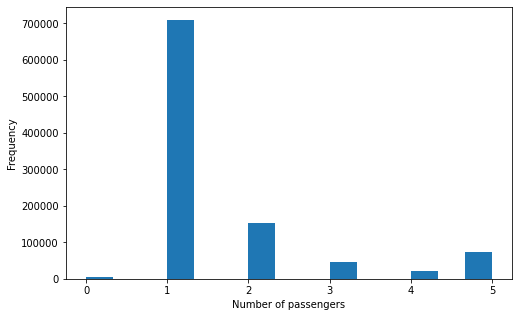

In [329]:
plt.figure(figsize=(8,5))
plt.hist(train["passenger_count"],bins=15)
plt.xlabel('Number of passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare Amount')

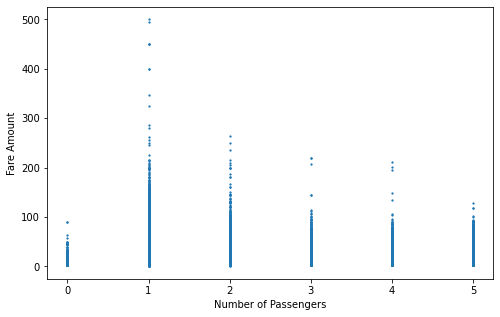

In [330]:
plt.figure(figsize = (8,5))
plt.scatter(x = train['passenger_count'], y = train['fare_amount'], s= 1.5)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')

We can notice that maximum fare is generated from single passengers .

Text(0, 0.5, 'Fare Amount')

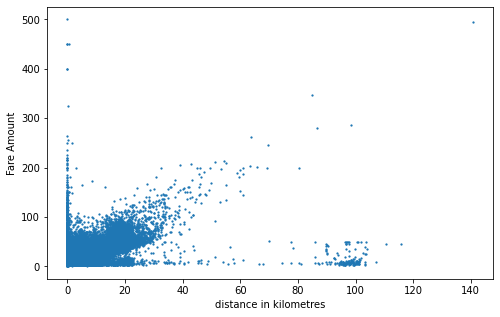

In [331]:
plt.figure(figsize = (8,5))
plt.scatter(x = train['haversine'], y = train['fare_amount'], s= 1.5)
plt.xlabel('distance in kilometres')
plt.ylabel('Fare Amount')

Text(0, 0.5, 'Fare')

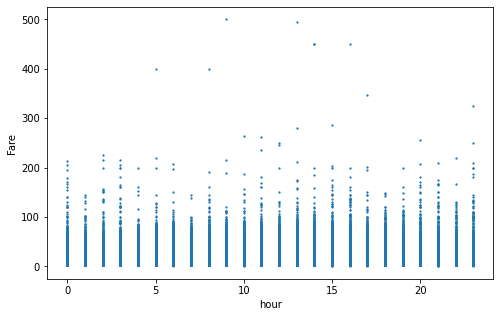

In [332]:
plt.figure(figsize = (8,5))
plt.scatter(x=train['hour'],y = train['fare_amount'],s = 1.5)
plt.xlabel('hour')
plt.ylabel('Fare')

<AxesSubplot:xlabel='hour', ylabel='fare_amount'>

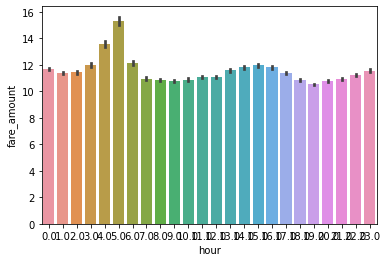

In [333]:
sns.barplot(x = train['hour'], y = train['fare_amount'])

the highest fare amount is reached at 5AM 

Text(0, 0.5, 'Fare')

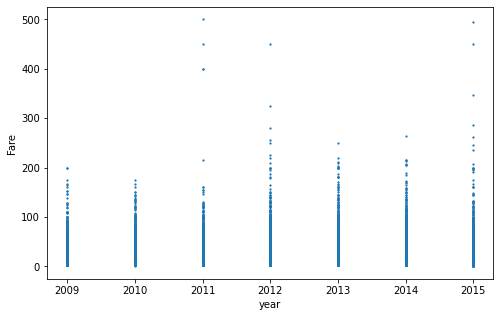

In [334]:
plt.figure(figsize = (8,5))
plt.scatter(x=train['year'],y = train['fare_amount'],s = 1.5)
plt.xlabel('year')
plt.ylabel('Fare')

<AxesSubplot:xlabel='year', ylabel='fare_amount'>

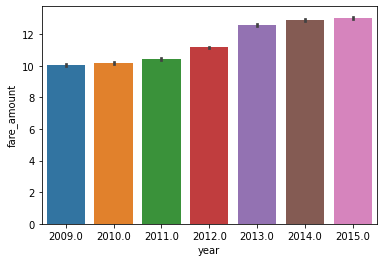

In [335]:
sns.barplot(x = train['year'], y = train['fare_amount'])

the fare amount increases from 2011 to 2015 . 

Text(0, 0.5, 'Fare')

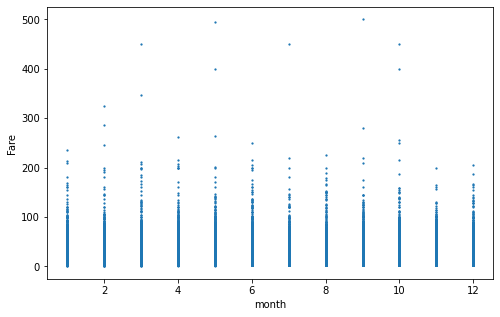

In [336]:
plt.figure(figsize = (8,5))
plt.scatter(x=train['month'],y = train['fare_amount'],s = 1.5)
plt.xlabel('month')
plt.ylabel('Fare')

<AxesSubplot:xlabel='month', ylabel='fare_amount'>

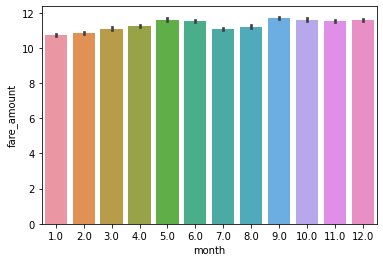

In [337]:
sns.barplot(x = train['month'], y = train['fare_amount'])

We can notice that the month doesn't seem to impact the fare amount . 

<AxesSubplot:>

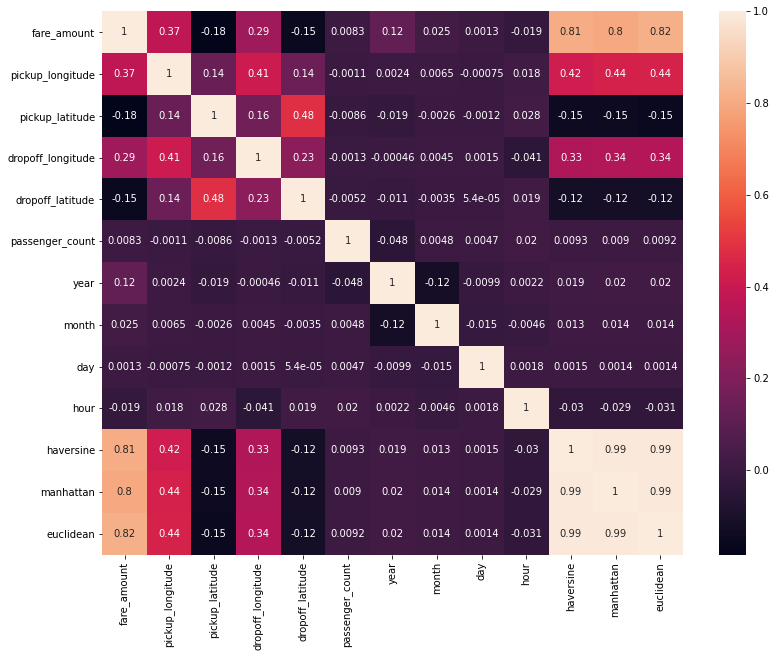

In [338]:
plt.figure(figsize=(13,10))
sns.heatmap(train.corr(),annot=True)

This map shows the correlation between numerical variables. The differing colors represent the correlation between the variables. The darker the violet gets the more negative the correlation become and the BRIGHTER the red gets the more positive the correlation gets.

## Mapping:

For a more contextualized representation, we can plot the pickup and dropoff on top of a map of New York.

In [339]:
BB_zoom = (-74.1, -73.7, 40.6, 40.85)
#read the map from an URL
nyc_map_zoom = plt.imread('https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/images/nyc_-74.1_-73.7_40.6_40.85.PNG?raw=true')

<ipython-input-339-78b4859b3fe4>:3: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  nyc_map_zoom = plt.imread('https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/images/nyc_-74.1_-73.7_40.6_40.85.PNG?raw=true')


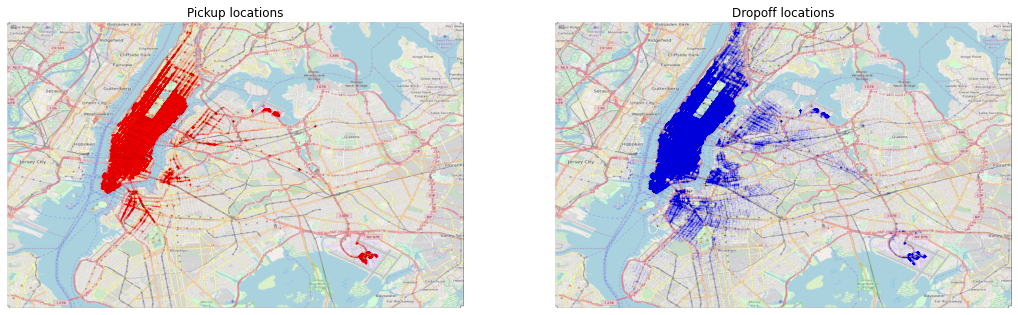

In [340]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2, color = False):
    fig, axs = plt.subplots(1, 2, figsize=(18, 22))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].axis('off')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].axis('off')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)
    
# plot training data on map zoomed in
plot_on_map(train.sample(1_000_000, random_state = 30), 
            BB_zoom, nyc_map_zoom, s=0.05, alpha=0.05)


## 4-Modeling : 

In [341]:
train = train.drop('pickup_datetime',axis = 1)
test = test.drop('pickup_datetime',axis =1)

### Muti-linear Regression Model : 

In [342]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'hour', 'haversine', 'manhattan', 'euclidean'],
      dtype='object')

In [343]:
y=train["fare_amount"].values
x=train.drop(columns=["fare_amount","pickup_latitude","dropoff_latitude","passenger_count","month","day","hour"]).values
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,random_state=30)


In [344]:
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data

predicted=model.predict(x_valid) #testing our model’s performance
predicted_train=model.predict(x_train)


print("MSE", mean_squared_error(y_valid,predicted))
print("R squared", metrics.r2_score(y_valid,predicted))

print("MSE", mean_squared_error(y_train,predicted_train))
print("R squared", metrics.r2_score(y_train,predicted_train))



MSE 28.189886623078582
R squared 0.7034087305421725
MSE 29.386814823536284
R squared 0.6895621094414355


### Linear regression : 

In [345]:
y=train["fare_amount"].values
x=train["manhattan"].values
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,random_state=30)


In [346]:
x_train = np.array(x_train)
x_train = x_train.reshape(-1,1)


x_valid = np.array(x_valid)
x_valid = x_valid.reshape(-1,1)

y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)

y_valid = np.array(y_valid)
y_valid = y_valid.reshape(-1,1)

In [347]:
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data


predicted=model.predict(x_valid) #testing our model’s performance
predicted_train=model.predict(x_train)

predicted = np.array(predicted)
predicted = predicted.reshape(-1,1)


print("MSE", mean_squared_error(y_valid,predicted))
print("R squared", metrics.r2_score(y_valid,predicted))

print("MSE", mean_squared_error(y_train,predicted_train))
print("R squared", metrics.r2_score(y_train,predicted_train))





MSE 33.51019250250075
R squared 0.6474327595927214
MSE 34.18153895837063
R squared 0.6389113650458202


We can notice that the mean squared error in linear regression is bigger than the MSE of multi-linear regression .So using more features improve the quality of our prediction .

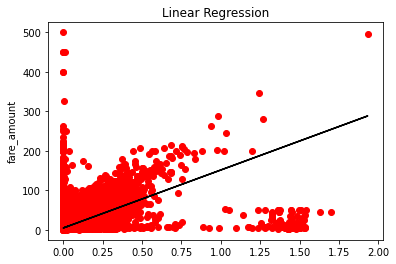

In [348]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("fare_amount")


x = x.reshape(-1,1)

plt.plot(x,model.predict(x),color="k")
plt.show()

### KNN : 

In [349]:
train["fare_amount"].min()

0.01

In [350]:
train["fare_amount"].max()


500.0

In [351]:
train["fare_amount"].mean()

11.30949902686955

In [352]:
train.loc[train["fare_amount"] <=50 , ["fare_amount1"]] = 0
train.loc[(train["fare_amount"] >50)&(train["fare_amount"] <=200), ["fare_amount1"]] = 1
train.loc[train["fare_amount"] >200, ["fare_amount1"]] = 2


In [353]:
y=train["fare_amount1"].values
x=train.drop(columns=["fare_amount","pickup_latitude","dropoff_latitude","passenger_count","month","day","hour","fare_amount1"])

In [354]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20% 


In [355]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_valid)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_valid),2))
    scores.append(round(accuracy_score(y_pred,y_valid),2))

Accuracy for k= 1 is: 0.99
Accuracy for k= 2 is: 0.99
Accuracy for k= 3 is: 0.99
Accuracy for k= 4 is: 0.99
Accuracy for k= 5 is: 0.99
Accuracy for k= 6 is: 0.99
Accuracy for k= 7 is: 0.99
Accuracy for k= 8 is: 0.99
Accuracy for k= 9 is: 0.99
Accuracy for k= 10 is: 0.99
Accuracy for k= 11 is: 0.99
Accuracy for k= 12 is: 0.99
Accuracy for k= 13 is: 0.99
Accuracy for k= 14 is: 0.99
Accuracy for k= 15 is: 0.99
Accuracy for k= 16 is: 0.99
Accuracy for k= 17 is: 0.99
Accuracy for k= 18 is: 0.99
Accuracy for k= 19 is: 0.99
Accuracy for k= 20 is: 0.99
Accuracy for k= 21 is: 0.99
Accuracy for k= 22 is: 0.99
Accuracy for k= 23 is: 0.99
Accuracy for k= 24 is: 0.99
Accuracy for k= 25 is: 0.99
Accuracy for k= 26 is: 0.99
Accuracy for k= 27 is: 0.99
Accuracy for k= 28 is: 0.99
Accuracy for k= 29 is: 0.99


In [356]:
knn=KNeighborsClassifier(n_neighbors=100) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier

y_pred=knn.predict(x_valid)  #Testing
y_pred_train=knn.predict(x_train)

print('Acuuracy=',accuracy_score(y_pred,y_valid))
print('Acuuracy=',accuracy_score(y_pred_train,y_train))



Acuuracy= 0.9940298804483559
Acuuracy= 0.9942301210318867


### Decision tree : 

In [357]:
y=train["fare_amount"].values
x=train.drop(columns=["fare_amount","pickup_latitude","dropoff_latitude","passenger_count","month","day","hour","fare_amount1"],axis=1).values

In [358]:
x.shape

(1005004, 6)

In [359]:
y.shape

(1005004,)

In [360]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,random_state=30)

In [361]:
x_train.shape

(804003, 6)

In [362]:
y_train.shape

(804003,)

In [369]:
from sklearn import utils

print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(x_train))
print(utils.multiclass.type_of_target(x_valid))
print(utils.multiclass.type_of_target(y_valid))

y_train=y_train.astype('float')
x_train=x_train.astype('float')
x_valid=x_valid.astype('float')
y_valid=y_valid.astype('float')



multiclass
multiclass-multioutput
multiclass-multioutput
multiclass


In [370]:
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(x_train))
print(utils.multiclass.type_of_target(x_valid))
print(utils.multiclass.type_of_target(y_valid))

multiclass
multiclass-multioutput
multiclass-multioutput
multiclass


In [371]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [372]:
tree1=tree.DecisionTreeClassifier(criterion="gini",splitter="random",max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)

tree1.fit(x_train,y_train)

y_pred=tree1.predict(x_valid)
y_pred_train=tree1.predict(x_train)

accuracy_score1=accuracy_score(y_valid,y_pred)
print("score:{}".format(accuracy_score1))

accuracy_score2=accuracy_score(y_train,y_pred_train)
print("score:{}".format(accuracy_score2))


print("MSE: ", metrics.mean_squared_error(y_valid, predicted))
print("R squared: ", metrics.r2_score(y_valid,predicted))

print("MSE: ", metrics.mean_squared_error(y_train, predicted_train))
print("R squared: ", metrics.r2_score(y_train,predicted_train))


score:0.14640225670519053
score:0.14574945615874568
MSE:  33.988802198507024
R squared:  0.6432266495827723
MSE:  34.64696300694215
R squared:  0.6348084819043097


### Random forest model

In [373]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics

In [374]:
clf=RandomForestClassifier(n_estimators = 10, max_depth = 20)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model

y_pred=clf.predict(x_valid)  #testing our model
y_pred_train=clf.predict(x_train)

print("Accuracy:", metrics.accuracy_score(y_valid, y_pred))#Measuring the accuracy of our model
print("Accuracy train:", metrics.accuracy_score(y_train, y_pred_train))


print("MSE: ", metrics.mean_squared_error(y_valid, predicted))
print("R squared: ", metrics.r2_score(y_valid,predicted))

print("MSE: ", metrics.mean_squared_error(y_train, predicted_train))
print("R squared: ", metrics.r2_score(y_train,predicted_train))

Accuracy: 0.24910323829234682
Accuracy train: 0.25164458341573354
MSE:  33.988802198507024
R squared:  0.6432266495827723
MSE:  34.64696300694215
R squared:  0.6348084819043097


### Polynomial regression : 

In [375]:
from sklearn.preprocessing import PolynomialFeatures 

In [379]:
y=train["fare_amount"].values
x=train.drop(columns=["fare_amount","pickup_latitude","dropoff_latitude","passenger_count","month","day","hour","fare_amount1"]).values

In [382]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=30)  #splitting data

poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
model.fit(x_train_fit, y_train)

x_valid_ = poly.fit_transform(x_valid)
x_train_ = poly.fit_transform(x_train)

predicted = model.predict(x_valid_)
predicted_train=model.predict(x_train_)

print("MSE: ", metrics.mean_squared_error(y_valid, predicted))
print("R squared: ", metrics.r2_score(y_valid,predicted))

print("MSE: ", metrics.mean_squared_error(y_train, predicted_train))
print("R squared: ", metrics.r2_score(y_train,predicted_train))



MSE:  21.35636024825608
R squared:  0.7753055880741525
MSE:  22.502829436569534
R squared:  0.7622834953758632


We can notice that the MSE of polynomial regression is lower than the MSE of the other models .So applying the polynomial regression model gives better result . 

### 5-Applying the polynomial regression model on the testing dataframe : 

In [378]:
X_train = test
X_train_fit = poly.fit_transform(x_train)
pred = model.predict(X_train_fit)
